<a href="https://colab.research.google.com/github/rilwan-yousuf1986/rilwan-yousuf1986.github.repo/blob/main/EDA%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
import warnings
warnings.filterwarnings('ignore')
sns.set(color_codes = True)

In [ ]:
## loading the data set into data frame
df = pd.read_csv('Cars_data.csv')

df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
## dropping irrelevent columns

cols_to_drop = [
    "Engine Fuel Type",
    "Market Category",
    "Vehicle Style",
    "Popularity",
    "Number of Doors",
    "Vehicle Size",

]

In [ ]:
df = df.drop(columns=cols_to_drop)
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [ ]:
df.shape

(11914, 10)

In [ ]:
## dropping null / missing values
df.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
highway MPG,0
city mpg,0
MSRP,0


In [ ]:
df = df.dropna()
df.isnull().sum()


,0
Make,0
Model,0
Year,0
Engine HP,0
Engine Cylinders,0
Transmission Type,0
Driven_Wheels,0
highway MPG,0
city mpg,0
MSRP,0


In [ ]:
df.describe()


,Year,Engine HP,Engine Cylinders,highway MPG,city mpg,MSRP
count,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000,1.181600e+04
mean,2010.360190,249.514472,5.650051,26.319736,19.326845,4.057590e+04
std,7.594077,109.261297,1.752333,7.442964,6.527183,6.032038e+04
min,1990.000000,55.000000,0.000000,12.000000,7.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,22.000000,16.000000,2.099000e+04
50%,2015.000000,227.000000,6.000000,26.000000,18.000000,2.996500e+04
75%,2016.000000,300.000000,6.000000,30.000000,22.000000,4.220500e+04
max,2017.000000,1001.000000,16.000000,354.000000,137.000000,2.065902e+06


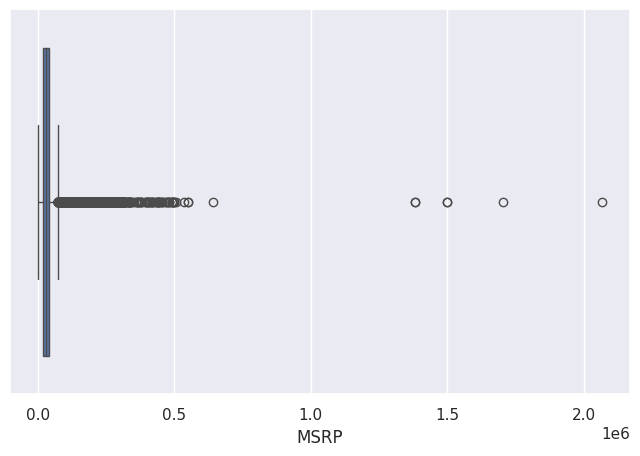

In [ ]:
### removing the outliers
plt.figure(figsize=(8,5))
sns.boxplot(x=df["MSRP"])
plt.show()

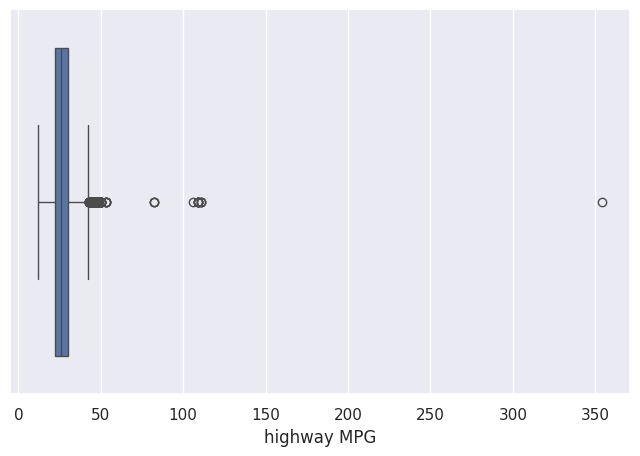

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["highway MPG"])
plt.show()


**Print numeric columns(int & float)**

In [ ]:
df.loc[:, df.dtypes.isin(["int64", "float64"])].columns

Index(['Year', 'highway MPG', 'city mpg', 'MSRP'], dtype='object')

**Save Numeric column names into list l**

In [ ]:
l = df.loc[:,df.dtypes.isin(["int64", "float64"])].columns.tolist()
l

['Year', 'highway MPG', 'city mpg', 'MSRP']

**Outlier removal using IQR Method**

In [ ]:
Q1 = df[l].quantile(0.25)
Q3 = df[l].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
df2 = df[~((df[l] < (Q1 - 1.5 * IQR)) |(df[l] > (Q3 + 1.5 *   IQR))).any(axis=1)]

In [ ]:
df.shape,df2.shape

((11816, 10), (9889, 10))

**Unique values and counts**

In [ ]:
for i in df.columns:
    print("-----------------", i ,"----------------")
    print(df[i].value_counts().head())


----------------- Make ----------------
Make
Chevrolet     1115
Ford           868
Volkswagen     805
Toyota         743
Dodge          626
Name: count, dtype: int64
----------------- Model ----------------
Model
Silverado 1500        156
Tundra                140
F-150                 126
Sierra 1500            90
Beetle Convertible     89
Name: count, dtype: int64
----------------- Year ----------------
Year
2015    2152
2016    2135
2017    1649
2014     579
2012     386
Name: count, dtype: int64
----------------- Engine HP ----------------
Engine HP
200.0    454
170.0    351
210.0    320
240.0    268
285.0    246
Name: count, dtype: int64
----------------- Engine Cylinders ----------------
Engine Cylinders
4.0     4743
6.0     4473
8.0     2031
12.0     230
5.0      225
Name: count, dtype: int64
----------------- Transmission Type ----------------
Transmission Type
AUTOMATIC           8234
MANUAL              2922
AUTOMATED_MANUAL     626
UNKNOWN               19
DIRECT_DRIVE      

**Histogram & Density Plot(HP)**

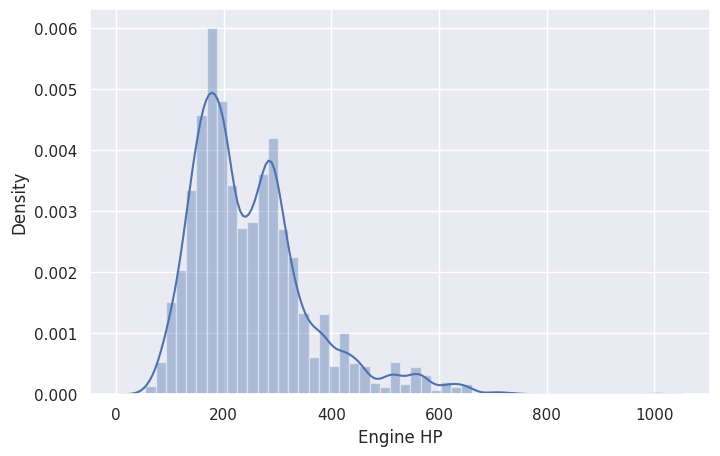

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(df["Engine HP"])
plt.show()


**Multiple univariatebplots using subplots**

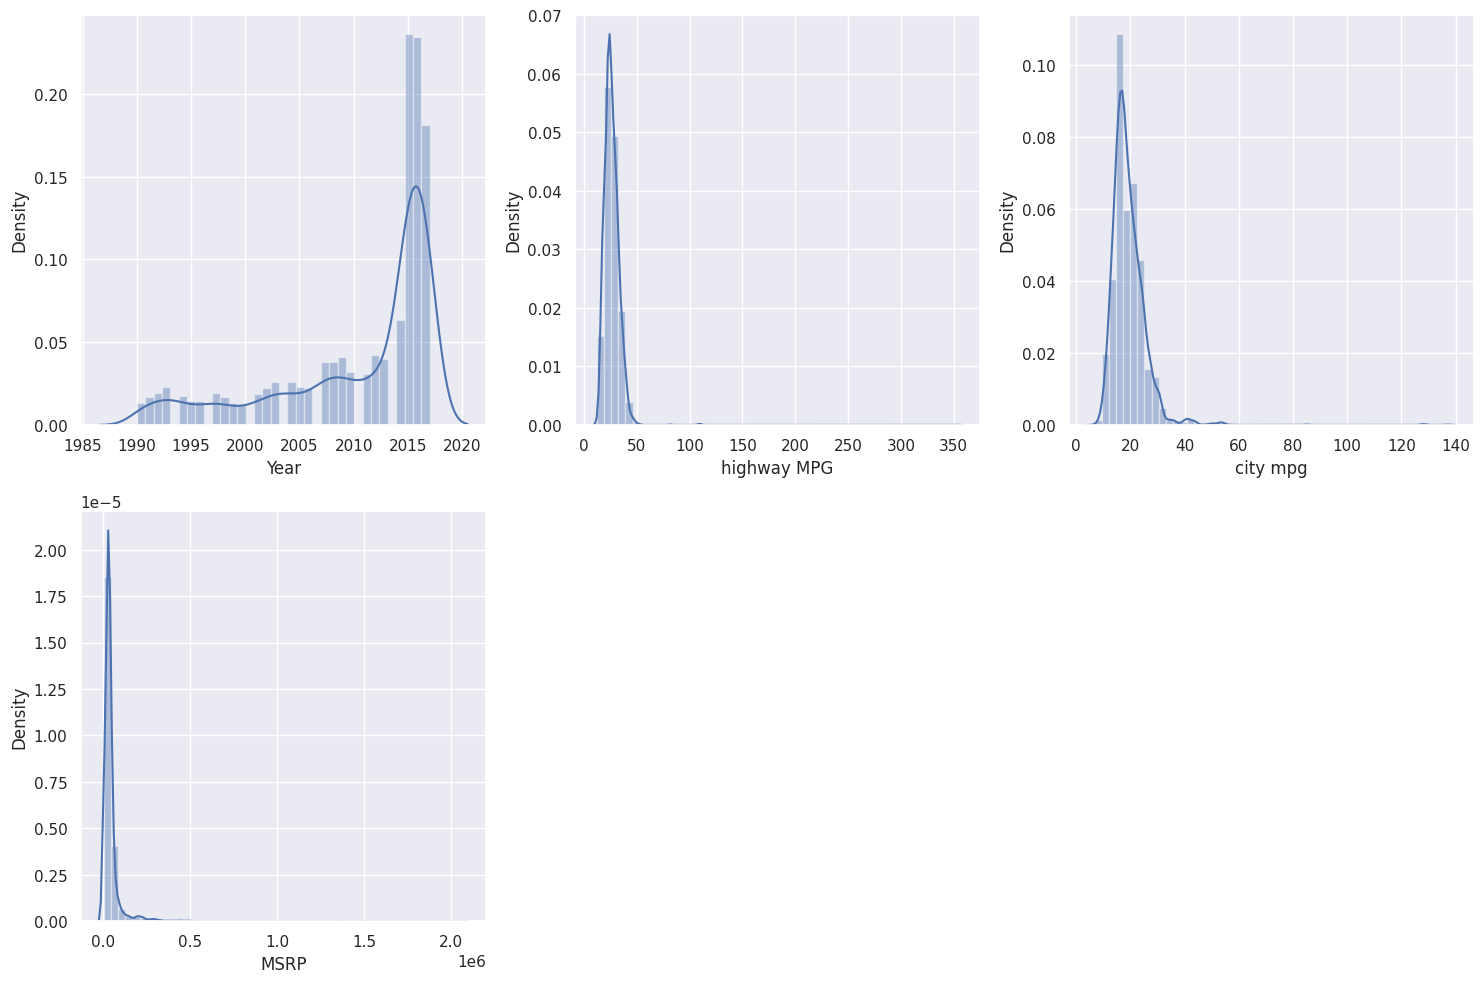

In [ ]:
c = 1
plt.figure(figsize=(15,10))

for i in l:
    plt.subplot(2,3,c)
    sns.distplot(df[i])
    c = c+1
plt.tight_layout()
plt.show()

**Bar Chart - Make vs Number of cars**

<Axes: xlabel='count', ylabel='Make'>

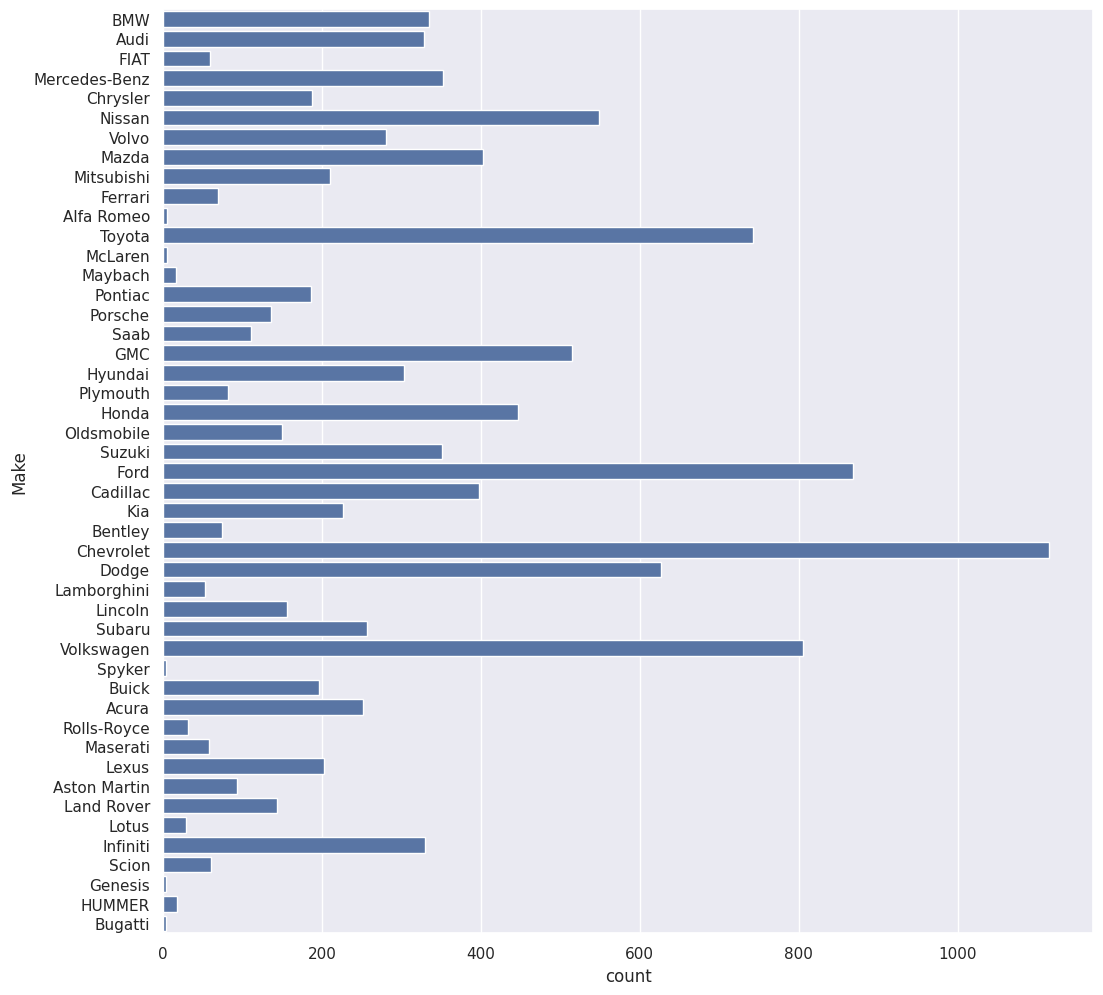

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(df["Make"])

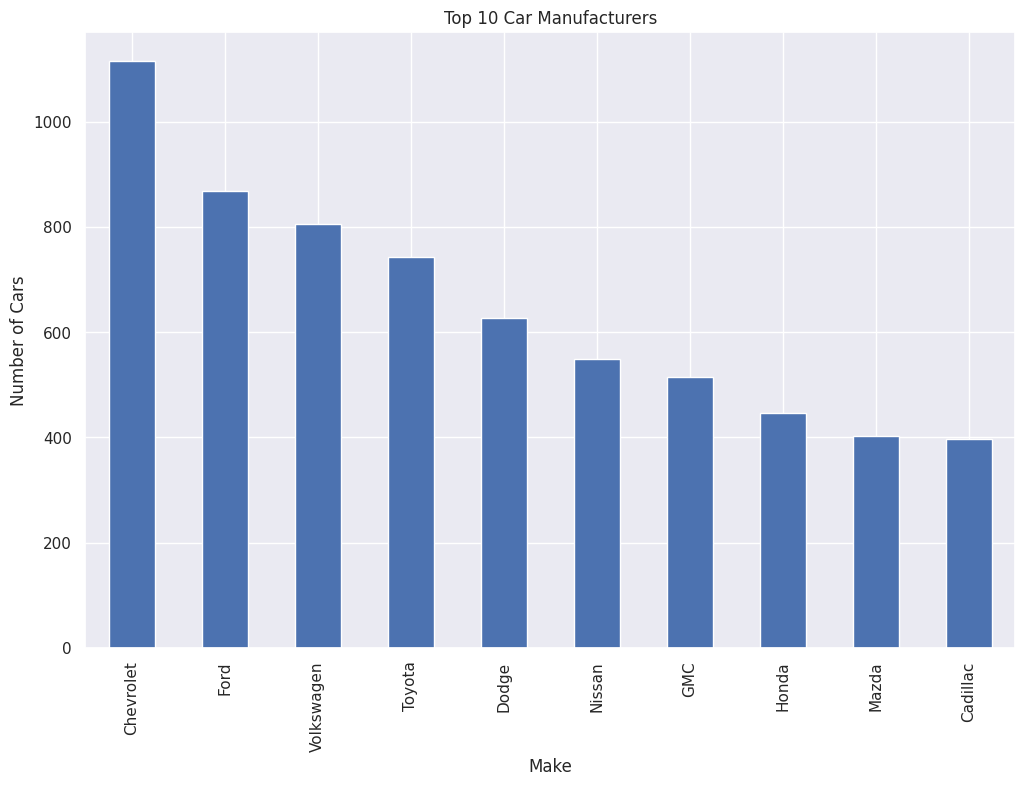

In [ ]:
plt.figure(figsize=(12,8))
df["Make"].value_counts().nlargest(10).plot(kind="bar")
plt.title("Top 10 Car Manufacturers")
plt.xlabel("Make")
plt.ylabel("Number of Cars")
plt.show()


**Count plot -Transmission vs Drive mode**

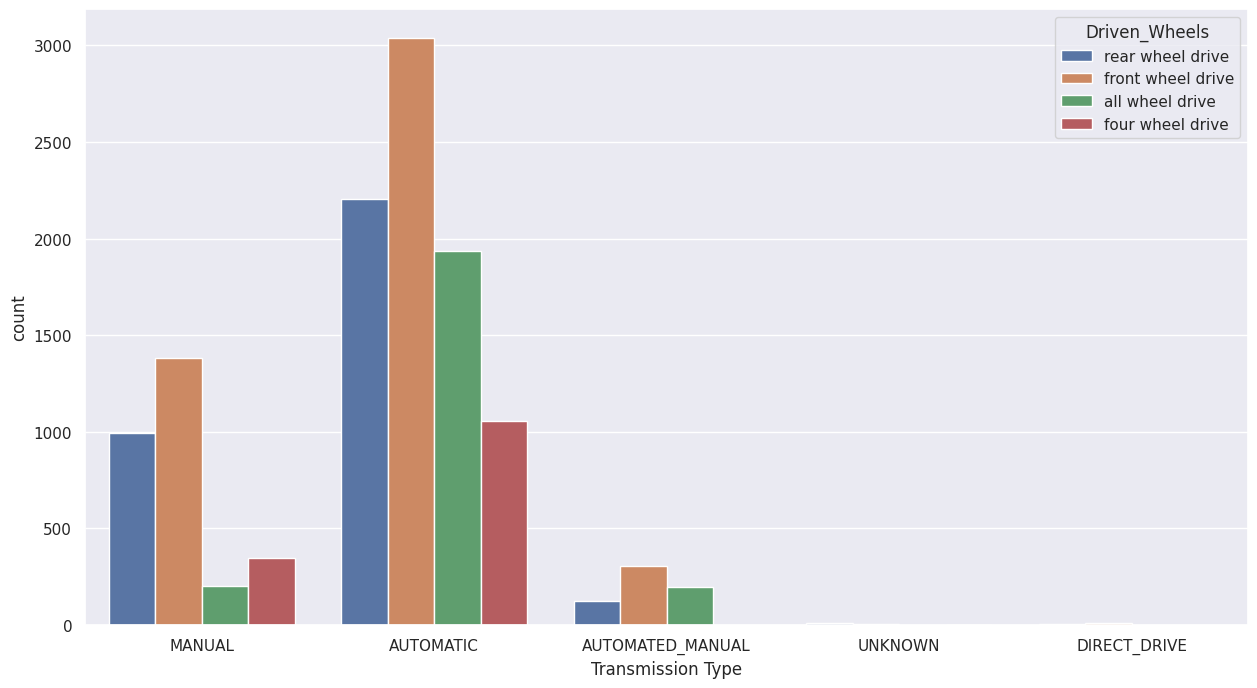

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x="Transmission Type", hue="Driven_Wheels", data = df)
plt.show()

**Scatter plot - HP vs Price**

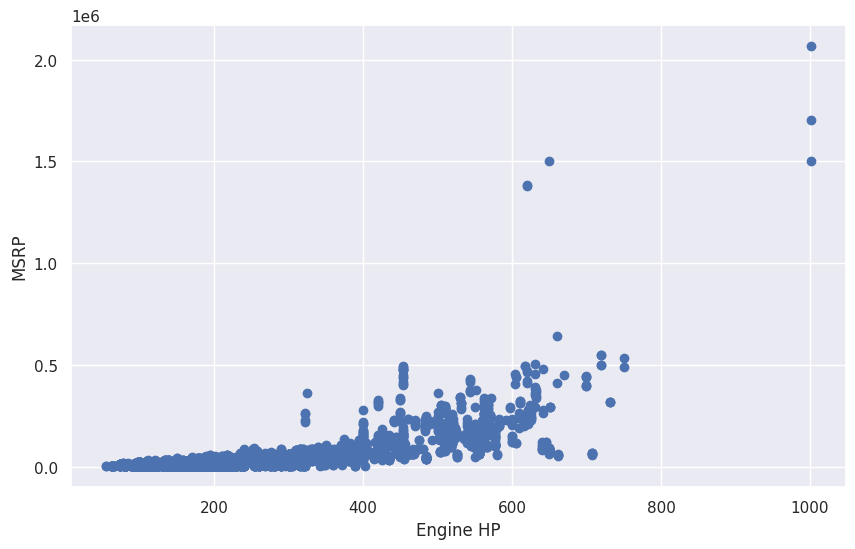

In [ ]:
fig, ax =plt.subplots(figsize=(10,6))
ax.scatter(df["Engine HP"], df["MSRP"])
ax.set_xlabel("Engine HP")
ax.set_ylabel("MSRP")
plt.show()

**Bar plot - Mean price by cylinders**

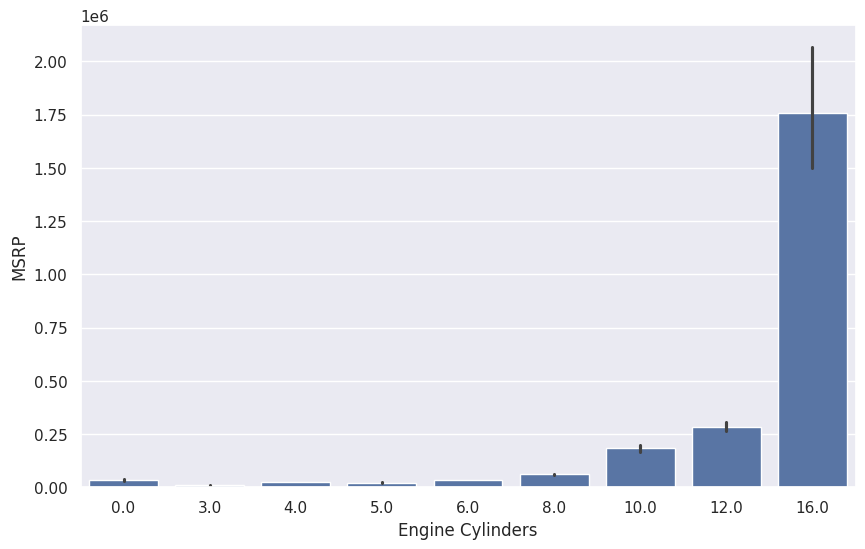

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="Engine Cylinders", y="MSRP", data=df)
plt.show()

**Horizontal Bar Plot - Transmission**

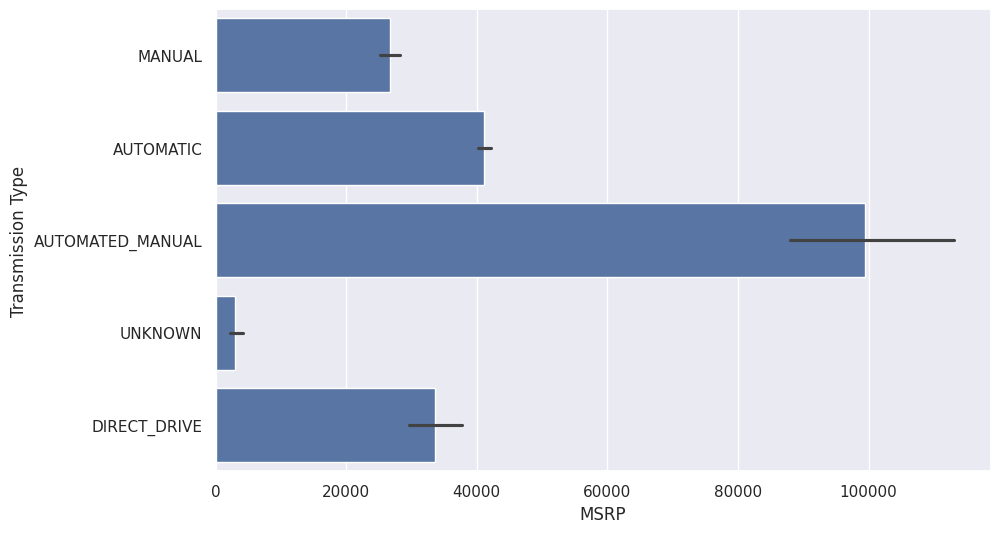

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="MSRP", y="Transmission Type", data=df,)
plt.show()

**Heat Map - Correlation**

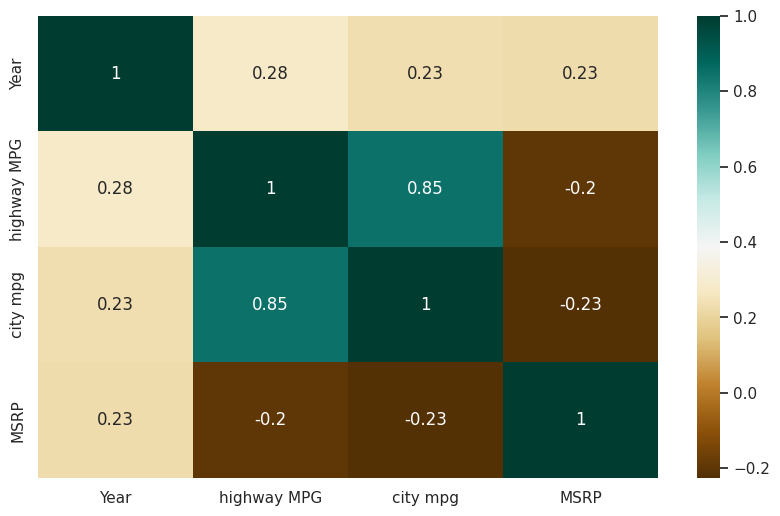

In [ ]:
corr = df[l].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,cmap="BrBG" ,annot=True)
plt.show()